## Arrays.

An array is a one-dimensional data-structure consisting of a collection of elements of the same data-type. 

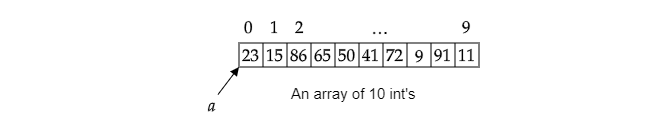

For example, we can create a `numpy.array` called `a` and store `10` **integers** in it.

In [2]:
import numpy as np

a = np.array([23,15,86,65,50,41,72,9,91,11])
a

array([23, 15, 86, 65, 50, 41, 72,  9, 91, 11])

Each element in the array can be efficiently located by its **index**. `numpy.array` indexes start from `0`. So, the first element of the array can be directly accessed using `a[0]`, the second element of the array can be directly accessed using `a[1]`. Elements of an array can be directly accessed using the array index. Accessing any element of the array (no matter how long it is) can be done in $O(1)$ time.

In [4]:
for i in range(len(a)):
    print(f"a[{i}] = {a[i]}")

a[0] = 23
a[1] = 15
a[2] = 86
a[3] = 65
a[4] = 50
a[5] = 41
a[6] = 72
a[7] = 9
a[8] = 91
a[9] = 11


This is possible because, in computer memory, elements of an array are stored in continguous (consecutive) memory locations. Arrays occupy a single-continuous slab(block) of memory in the RAM. 

For example, one `int` occupies $4$ bytes. An array of $10$ ($4$-byte) integer variables, with indices $0$ through $9$ may be stored at memory addresses $2000$, $2004$, $\ldots$, $2036$. So the element with index $i$ has the address $2000 + (i \times 4)$.

An array is stored so that the address of each element can be computed from its **index**.

**Arrays are fixed-size containers**. Once an array of $10$ `int`'s has been allocated, an $11$th element cannot be added to this array `a`.  Arrays in most programming languages, have to be declared in advance; therefore, their sizes have to be known
before the program starts. This means that the programmer needs a fair knowledge of the problem being programmed to choose the right size for the array. If the size is too big, then the array unnecessarily occupies memory space, which is basically
wasted. If the size is too small, the array can overflow with data and the program will abort.

---
**Definition**. An array is a 

- fixed-size container 
- that occupies contiguous memory locations
- that can be used to store a collection of elements of the same data-type
- and can be accessed using an array index.

---

`numpy` arrays support negative indices.

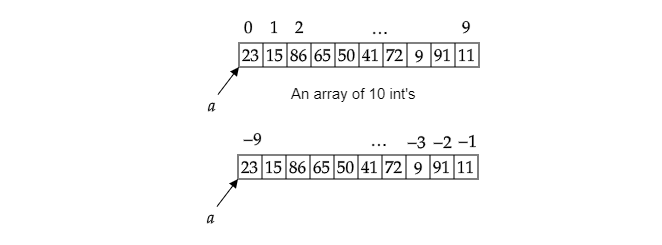

## Insertion Sort.

Our first algorithm, insertion sort, solves the sorting problem. 

**Input** : A sequence of numbers $[a_0,a_1,\ldots,a_{n-1}]$.

**Output** : A permutation (reordering) of numbers $[a_0',a_1',\ldots,a_{n-1}']$ of the input sequence such that 
$$a_1' \leq a_2' \leq \ldots \leq a_n'$$

We start with **insertion sort**, which is an efficient algorithm for sorting a small number of elements. Insertion sort works the way many people sort a hand of playing cards. We start with an empty left-hand and the cards face down on the table. We then remove one card at a time from the table and insert it into the correct position in the left hand. To find the correct position for a card, we compare it with each of the cards already in the hand, from right to the left, as illustrated in the figure. At all times, the cards held in the left hand are sorted, and these cards were originally the top cards of the pile on the table.

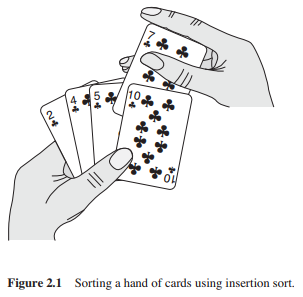

We present our code for insertion sort as a function `insertionSort(A)` which takes as a parameter an array `A[0..n-1]` of $n$ elements that is to be sorted. The algorithm sorts the input numbers in place: it rearranges the numbers within the array $A$. 

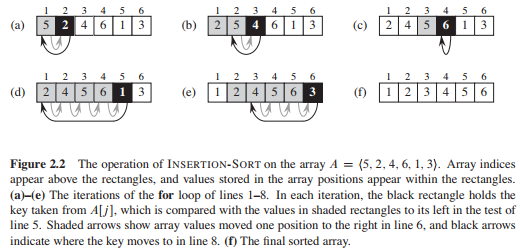

In [8]:
def insertionSort(A):
    for j in range(1,len(A)):
        key = A[j]
        
        # Insert A[j] into the sorted sequence A[0..j-1]
        i = j-1
        while i >= 0 and A[i] > key:
            A[i + 1] = A[i]
            i = i - 1
        A[i+1] = key
        
    return A

In [10]:
A = np.array([5,2,4,6,1,3])
insertionSort(A)

array([1, 2, 3, 4, 5, 6])

The figure shows how this algorithm works for `A = np.array([5,2,4,6,1,3])`. The index $j$ indicates the current card being inserted into the hand. At the beginning of each iteration of the `for` loop, which is indexed by $j$, the subarray consisting of the elements $A[0..j-1]$ constitutes the currently sorted hand, and the remaining subarray $A[j+1..n-1]$ corresponds to the pile of cards still on the table. In fact, $A[0..j-1]$ are the elements *originally* in the positions $0$ through $j-1$, but now in sorted order. 

### Why does insertion sort work?

We prove this using mathematical induction.

**Initialization** : At initialization, the variable $j$ equals $1$. The subarray $A[0..j-1] = A[0]$ consists of a single element and a singleton array is always sorted.

**Maintenance** : Consider the $j$th iteration of the array. Assume that `A[0..j-1]` is sorted. We pull out the element `A[j]` and call it `key`. We are basically interested to find the proper position in the subarray `A[0..j-1]` for inserting the `key`. To insert the `key`, we must create vacant space for it, in the subarray `A[0..j-1]`. Thus, beginning with `A[j-1]`, we start shifting the elements to the right, one element at a time, by copying `A[j-1]` to `A[j]`, `A[j-2]` to `A[j-1]`, `A[j-3]` to `A[j-2]`. We set `i = j-1` and copy `A[i]` to `A[i+1]`. This process continues, until an element `A[i]` is found that is smaller than the `key` or we reach the end and no such element could be found (`i = -1`). In both cases, the `key` should be copied to `A[i+1]`. It is imperative, that the subarray `A[0..j]` is sorted after the $j$th iteration.

**Termination** : Finally we examine what happens when the loop terminates. The condition causing the `for` loop to terminate is that `j > len(A)-1`. Because each loop iteration increases $j$ by $1$, we must have $j = n$ at that time. Substituting $n$ for $j$, we have that, at the end of the $(n-1)$st iteration, the subarray `A[0..n-1]` consists of the elements originally in `A[0..n-1]`, but in the sorted order. Observe that, `A[0..n-1]` is the entire array, we conclude that the entire array is sorted.

## Merge Sort

